# Collecting Data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
std=pd.read_csv(r'C:\Users\Vikas\Downloads\student_record.csv')
std

,Name,OverallGrade,Obeident,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,Y,60,59,No
7,Trent,C,Y,75,33,No


In [37]:
print('Dimension of csv file:',std.shape)

Dimension of csv file: (8, 6)


# Analyzing Data

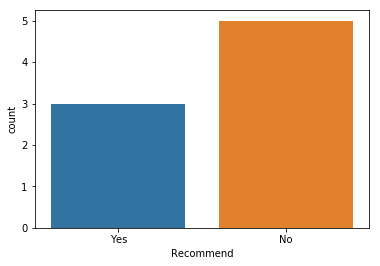

In [38]:
sns.countplot('Recommend',data=std)

In [39]:
print('The Minimum and Maximum ProjectScore are:-',(std['ProjectScore'].min(),std['ProjectScore'].max()))

The Minimum and Maximum ProjectScore are:- (17, 85)


In [40]:
print('The Minimum and Maximum ResearchScore are:-',(std['ResearchScore'].min(),std['ResearchScore'].max()))

The Minimum and Maximum ResearchScore are:- (10, 92)


In [41]:
#the student which got ProjectScore greater then 50
std[std.ProjectScore>50] 

,Name,OverallGrade,Obeident,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
3,Holmes,B,Y,75,71,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,Y,60,59,No


In [42]:
#the student which got ProjectScore less then 50
std[std.ProjectScore<50] 

,Name,OverallGrade,Obeident,ResearchScore,ProjectScore,Recommend
2,David,F,N,10,17,No
4,Marvin,E,N,20,30,No
7,Trent,C,Y,75,33,No


In [43]:
#show the list even number student
std.iloc[::2]

,Name,OverallGrade,Obeident,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
2,David,F,N,10,17,No
4,Marvin,E,N,20,30,No
6,Robert,B,Y,60,59,No


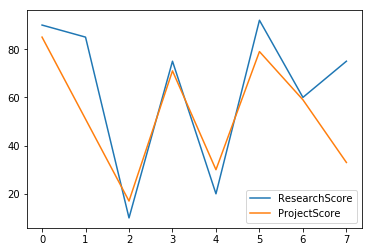

In [44]:
std.plot() #show the marks through graph

# Data Preparation

In [282]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
Name             8 non-null object
OverallGrade     8 non-null object
Obeident         8 non-null object
ResearchScore    8 non-null int64
ProjectScore     8 non-null int64
Recommend        8 non-null object
dtypes: int64(2), object(4)
memory usage: 296.0+ bytes


In [283]:
std.head(2)

,Name,OverallGrade,Obeident,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes


In [284]:
#working on categorical data
categorical_name=['OverallGrade','Obeident']

In [285]:
pd.get_dummies(std['OverallGrade'])

,A,B,C,E,F
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
5,1,0,0,0,0
6,0,1,0,0,0
7,0,0,1,0,0


here,we have five value,if we know the value of four column then we automatically get the value of fifth column,so there is no need of fifth column.so,we should remove it

In [286]:
pd.get_dummies(std['OverallGrade'],drop_first=True)

,B,C,E,F
0,0,0,0,0
1,0,1,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
5,0,0,0,0
6,1,0,0,0
7,0,1,0,0


In [287]:
#now store them into variable grade
Grade=pd.get_dummies(std['OverallGrade'],drop_first=True)
Grade.head()

,B,C,E,F
0,0,0,0,0
1,0,1,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [288]:
#similarly we do for column obeident
Obdent=pd.get_dummies(std['Obeident'])
Obdent.head()

,N,Y
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [289]:
Obdent=pd.get_dummies(std['Obeident'],drop_first=True)
Obdent.head()

,Y
0,1
1,0
2,0
3,1
4,0


In [290]:
#now we get two new column Grade,obdent ,so now we should add these column in data by using concat
std=pd.concat([std,Grade,Obdent],axis=1)
std

,Name,OverallGrade,Obeident,ResearchScore,ProjectScore,Recommend,B,C,E,F,Y
0,Henry,A,Y,90,85,Yes,0,0,0,0,1
1,John,C,N,85,51,Yes,0,1,0,0,0
2,David,F,N,10,17,No,0,0,0,1,0
3,Holmes,B,Y,75,71,No,1,0,0,0,1
4,Marvin,E,N,20,30,No,0,0,1,0,0
5,Simon,A,Y,92,79,Yes,0,0,0,0,1
6,Robert,B,Y,60,59,No,1,0,0,0,1
7,Trent,C,Y,75,33,No,0,1,0,0,1


Here,my column is added,now we should remove unnecessary column

In [291]:
#now drop the unnecessary column
std.drop(['Name','OverallGrade','Obeident'],axis=1,inplace=True)

In [292]:
#now check my column is drop or not
std

,ResearchScore,ProjectScore,Recommend,B,C,E,F,Y
0,90,85,Yes,0,0,0,0,1
1,85,51,Yes,0,1,0,0,0
2,10,17,No,0,0,0,1,0
3,75,71,No,1,0,0,0,1
4,20,30,No,0,0,1,0,0
5,92,79,Yes,0,0,0,0,1
6,60,59,No,1,0,0,0,1
7,75,33,No,0,1,0,0,1


In [293]:
#defining the x and y variable
x=std.drop(['Recommend'],axis=1)
y=std['Recommend'].values

In [294]:
x

,ResearchScore,ProjectScore,B,C,E,F,Y
0,90,85,0,0,0,0,1
1,85,51,0,1,0,0,0
2,10,17,0,0,0,1,0
3,75,71,1,0,0,0,1
4,20,30,0,0,1,0,0
5,92,79,0,0,0,0,1
6,60,59,1,0,0,0,1
7,75,33,0,1,0,0,1


In [295]:
y

array(['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No'], dtype=object)

# Train-Test

In [296]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [297]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [298]:
y_pred=logreg.predict(x_test)
y_pred

array(['No', 'No'], dtype=object)

In [299]:
#Evaluating model performance
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         No       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         2



# Accuracy Score

In [300]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

100.0

# Another Method

In [45]:
# get features and response
feature_names = ['OverallGrade', 'Obeident', 'ResearchScore', 'ProjectScore']
training_features = std[feature_names]

response_name = ['Recommend']
response_labels = std[response_name]

In [46]:
#view feature
training_features

,OverallGrade,Obeident,ResearchScore,ProjectScore
0,A,Y,90,85
1,C,N,85,51
2,F,N,10,17
3,B,Y,75,71
4,E,N,20,30
5,A,Y,92,79
6,B,Y,60,59
7,C,Y,75,33


In [47]:
#view response label
response_labels

,Recommend
0,Yes
1,Yes
2,No
3,No
4,No
5,Yes
6,No
7,No


In [48]:
# list down features based on type
numeric_feature_names = ['ResearchScore', 'ProjectScore']
categoricial_feature_names = ['OverallGrade', 'Obeident']

In [49]:
#working on numerical data
#scaling data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# fit scaler on numeric features
sc.fit(training_features[numeric_feature_names])
# scale numeric features now
sc.transform(training_features[numeric_feature_names])

array([[ 0.89958341,  1.37664985],
       [ 0.73064756, -0.09177666],
       [-1.80339021, -1.56020317],
       [ 0.39277585,  0.77200364],
       [-1.46551851, -0.99874597],
       [ 0.96715775,  1.11751576],
       [-0.1140317 ,  0.25373546],
       [ 0.39277585, -0.86917893]])

In [59]:
#store them in original data
training_features[numeric_feature_names]=sc.transform(training_features[numeric_feature_names])

In [51]:
# view updated feature set
training_features

,OverallGrade,Obeident,ResearchScore,ProjectScore
0,A,Y,0.899583,1.376650
1,C,N,0.730648,-0.091777
2,F,N,-1.803390,-1.560203
3,B,Y,0.392776,0.772004
4,E,N,-1.465519,-0.998746
5,A,Y,0.967158,1.117516
6,B,Y,-0.114032,0.253735
7,C,Y,0.392776,-0.869179


# Working on categorical features

In [52]:
training_features = pd.get_dummies(training_features, columns=categoricial_feature_names)

In [53]:
# view newly  features
training_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_B,OverallGrade_C,OverallGrade_E,OverallGrade_F,Obeident_N,Obeident_Y
0,0.899583,1.376650,1,0,0,0,0,0,1
1,0.730648,-0.091777,0,0,1,0,0,1,0
2,-1.803390,-1.560203,0,0,0,0,1,1,0
3,0.392776,0.772004,0,1,0,0,0,0,1
4,-1.465519,-0.998746,0,0,0,1,0,1,0
5,0.967158,1.117516,1,0,0,0,0,0,1
6,-0.114032,0.253735,0,1,0,0,0,0,1
7,0.392776,-0.869179,0,0,1,0,0,0,1


# Modeling

In [54]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(training_features, np.array(response_labels['Recommend']))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
#prediction
y_pred=logreg.predict(training_features)
y_pred

array(['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [56]:
#actual prediction
actual_pred=np.array(response_labels['Recommend'])

In [57]:
from sklearn.metrics import classification_report
print(classification_report(actual_pred,y_pred))

             precision    recall  f1-score   support

         No       1.00      1.00      1.00         5
        Yes       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         8



In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(actual_pred,y_pred)*100

100.0